# OTA settling survey

This interactive document is intended to keep track of the state-of-the-art operational transconductance circuits (OTAs) designed for fast settling. This information elaborated using the Figures of Merit (FOMs) discussed in [Slew-Rate Enhancement Techniques for Switched-Capacitors Fast-Settling Amplifiers: A Review, Chips 2024, 3(2), 98-128; https://doi.org/10.3390/chips3020005] can be used to guide the design of optimal OTAs for switched-capacitors (SC) applications.

## Imports and settings

Required modules: numpy, matplotlib, pandas

The xlsx spreadsheet is **ota-settling-survey.xlsx** contained in the same path as this notebook.

## Data structure ##

The **namespace** is populated with variables corresponding to the column name of xlsx file. Besides, variables are assigned for easy manipulation. The assignment can also be used for debugging of the xlsx file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from IPython.display import display

x0 = pd.read_excel('ota-settling-survey.xlsx', header=1)
units = x0.iloc[0]
x = x0.iloc[1:]

# Global swicth variable to filter the designs only to measured results
exclude_simulation_results = False
if exclude_simulation_results:
    x = x.loc[x['EXPM']=='Measured']

DOI = np.array(x['DOI'])
AU1 = np.array(x['AU1'])
YEAR = np.array(x['YEAR'], dtype=np.int16)
CMOS = np.array(x['CMOS'].fillna(0), dtype=np.int16)
NS = np.array(x['NS'], dtype=np.int8)
BETA = np.array(x['BETA'], dtype=np.single)
CLE = np.array(x['CLE'], dtype=np.single)
SUP = np.array(x['SUP'], dtype=np.single)
DVS = np.array(x['DVS'], dtype=np.single)
SRP = np.array(x['SRP'], dtype=np.single)
SRN = np.array(x['SRN'], dtype=np.single)
UGF = np.array(x['UGF'], dtype=np.single)
TSP = np.array(x['TSP'], dtype=np.single)
TSN = np.array(x['TSN'], dtype=np.single)
SERR = np.array(x['SERR'], dtype=np.single)
PWR = np.array(x['PWR'], dtype=np.single)
AREA = np.array(x['AREA'], dtype=np.single)
A0 = np.array(x['A0'], dtype=np.single)
PM = np.array(x['PM'], dtype=np.single)

## Figures of Merit ##

Figure of Merits are defined as:

\begin{equation}
\mathrm{FOML} = \frac{\mathrm{SR} \times C_{LE}}{\mathrm{PWR}}
\end{equation}

\begin{equation}
\mathrm{FOMS} = \frac{\mathrm{UGF} \times C_{LE}}{\mathrm{PWR}}
\end{equation}

\begin{equation}
\mathrm{FOMT} = \frac{C_{LE}}{t_\mathrm{SET}\times\mathrm{PWR}}
\end{equation}

\begin{equation}
\mathrm{FOMN} = \frac{C_{LE}\times\Delta V_S}{t_\mathrm{SET}\times\mathrm{I_{DD}}}
\end{equation}

In the last equation $I_{DD}$ indicates the drawn from the supply ($I_{DD} = \mathrm{PWR}/V_{DD}$).

In [2]:
# extract worst-case conditions (ignores NaNs)
SR = np.fmin(SRP, SRN)
TS = np.fmax(TSP, TSN)
x['SR'] = SR.tolist()
x['TS'] = TS.tolist()

In [3]:
# calaculate the FOMs
FOMS = UGF*CLE/PWR
FOML = SR*CLE/PWR
FOMT = CLE/(TS*PWR)
FOMN = DVS*FOMT*SUP

# add to dataframe
x['FOMS'] = FOMS.tolist()
x['FOML'] = FOML.tolist()
x['FOMT'] = FOMT.tolist()
x['FOMN'] = FOMN.tolist()

## Data Analysis and Representation

Data can be used to classify designs in terms of performance, as well as to discuss the degree of adequacy of the FOMs. Output can be represented both in tabular or in graphical form.

### Straightforward classification

In [4]:
def display_sorted(sort_key, number=10, print_key_list=['DOI', 'AU1', 'YEAR', 'CLE', 'PWR'], df=x):
    sorted_x = df.sort_values(by=sort_key, ascending=False)
    key_list = print_key_list[:]
    key_list.append(sort_key)
    display(sorted_x[key_list][0:number-1])

print('-'*80+'\nTOP 10 sorted by FOMS')
display_sorted('FOMS')

print('-'*80+'\nTOP 10 sorted by FOML')
display_sorted('FOML') 

print('-'*80+'\nTOP 10 sorted by FOMT')
display_sorted('FOMT')

print('-'*80+'\nTOP 10 sorted by FOMN')
display_sorted('FOMN')


--------------------------------------------------------------------------------
TOP 10 sorted by FOMS


,DOI,AU1,YEAR,CLE,PWR,FOMS
25,10.1109/TCSI.2016.2584919,Hong,2016.0,15000,7.4,3445.945801
24,10.1109/TCSI.2016.2584919,Hong,2016.0,1500,7.4,344.594604
55,10.1109/JSSC.2014.2364037,Tan,2014.0,680,12.7,180.440933
53,10.1109/TCSI.2014.2333364,Mak,2014.0,19000,36.5,150.438354
52,10.1109/TCSI.2014.2333364,Mak,2014.0,4400,36.5,130.191788
54,10.1109/JSSC.2014.2364037,Tan,2014.0,330,12.7,109.393707
51,10.1109/ISSCC.2014.6757438,Qu,2014.0,500,6.3,106.349205
50,10.1109/ISSCC.2012.6177044,Yan,2012.0,15000,144,98.958336
80,10.1109/TVLSI.2019.2918235,Paul,2019.0,50,0.39,92.307693


--------------------------------------------------------------------------------
TOP 10 sorted by FOML


,DOI,AU1,YEAR,CLE,PWR,FOML
25,10.1109/TCSI.2016.2584919,Hong,2016.0,15000,7.4,2229.729736
24,10.1109/TCSI.2016.2584919,Hong,2016.0,1500,7.4,1189.864868
23,10.1109/TCSI.2016.2584919,Hong,2016.0,100,7.4,117.162163
77,10.1109/PRIME58259.2023.10161977,Gagliardi,2023.0,1000,13.2,56.969696
16,10.1109/TCSI.2006.887639,Galan,2007.0,80,120,52.000000
20,10.1109/JSSC.2005.845977,Lopez,2005.0,80,120,52.000000
21,10.1109/JSSC.2005.845977,Lopez,2005.0,80,120,50.666668
51,10.1109/ISSCC.2014.6757438,Qu,2014.0,500,6.3,49.206348
55,10.1109/JSSC.2014.2364037,Tan,2014.0,680,12.7,35.874016


--------------------------------------------------------------------------------
TOP 10 sorted by FOMT


,DOI,AU1,YEAR,CLE,PWR,FOMT
25,10.1109/TCSI.2016.2584919,Hong,2016.0,15000,7.4,0.844595
51,10.1109/ISSCC.2014.6757438,Qu,2014.0,500,6.3,0.070862
24,10.1109/TCSI.2016.2584919,Hong,2016.0,1500,7.4,0.047140
55,10.1109/JSSC.2014.2364037,Tan,2014.0,680,12.7,0.044619
54,10.1109/JSSC.2014.2364037,Tan,2014.0,330,12.7,0.037120
50,10.1109/ISSCC.2012.6177044,Yan,2012.0,15000,144,0.023200
74,10.1109/TCSII.2014.2368972,Yan,2014.0,500,32.4,0.022046
77,10.1109/PRIME58259.2023.10161977,Gagliardi,2023.0,1000,13.2,0.016153
73,10.1109/TCSII.2014.2368972,Yan,2014.0,150,32.4,0.013228


--------------------------------------------------------------------------------
TOP 10 sorted by FOMN


,DOI,AU1,YEAR,CLE,PWR,FOMN
25,10.1109/TCSI.2016.2584919,Hong,2016.0,15000,7.4,0.278716
77,10.1109/PRIME58259.2023.10161977,Gagliardi,2023.0,1000,13.2,0.140725
20,10.1109/JSSC.2005.845977,Lopez,2005.0,80,120,0.023392
50,10.1109/ISSCC.2012.6177044,Yan,2012.0,15000,144,0.023200
51,10.1109/ISSCC.2014.6757438,Qu,2014.0,500,6.3,0.022959
54,10.1109/JSSC.2014.2364037,Tan,2014.0,330,12.7,0.022272
21,10.1109/JSSC.2005.845977,Lopez,2005.0,80,120,0.020202
24,10.1109/TCSI.2016.2584919,Hong,2016.0,1500,7.4,0.015556
74,10.1109/TCSII.2014.2368972,Yan,2014.0,500,32.4,0.013228


In [5]:
def apa_style_annotations():
    # simple function to create an 'Author+Year' string to annotate the scatter plots
    y = YEAR.astype(str)
    return (AU1+y).astype(str)

def ns_to_color(ii):
    # simple function to select a color associated to the NS field
    npx = x['NS'].to_numpy()
    if npx[ii] == 1: 
        cl = 'blue'
    elif npx[ii] == 2:
        cl = 'red'
    elif npx[ii] == 3:
        cl = 'green'
    else:
        cl = 'black'
    return cl

### FOM scatter plots

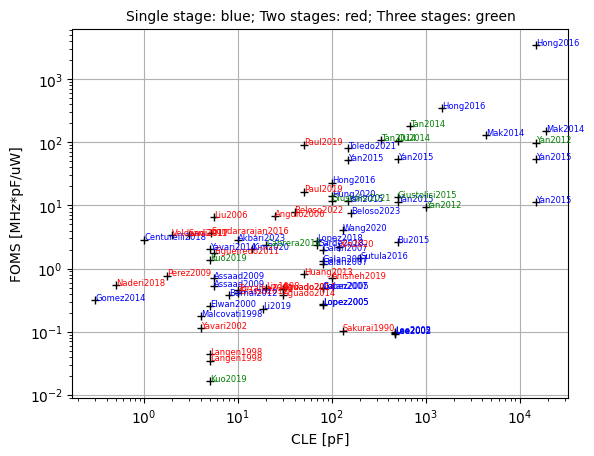

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(CLE, FOMS, 'k+')
ax.set_xlabel('CLE [pF]')
for ii, annotation in enumerate(apa_style_annotations()):
    xx=CLE[ii] 
    yy=FOMS[ii]
    if np.isfinite(xx) and np.isfinite(yy):
        ax.text(xx, yy, annotation, color=ns_to_color(ii), fontsize=6)
ax.set_ylabel('FOMS [MHz*pF/uW]')
ax.set_title('Single stage: blue; Two stages: red; Three stages: green', fontsize=10)
ax.grid()

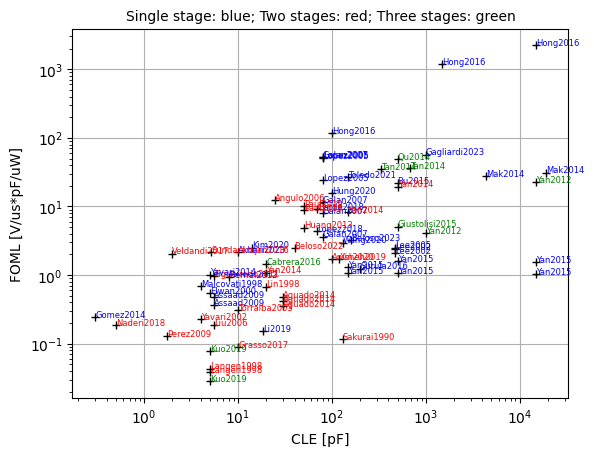

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(CLE, FOML, 'k+')
ax.set_xlabel('CLE [pF]')
for ii, annotation in enumerate(apa_style_annotations()):
    xx=CLE[ii] 
    yy=FOML[ii]
    if np.isfinite(xx) and np.isfinite(yy):
        ax.text(xx, yy, annotation, color=ns_to_color(ii), fontsize=6)
ax.set_ylabel('FOML [V/us*pF/uW]')
ax.set_title('Single stage: blue; Two stages: red; Three stages: green', fontsize=10)
ax.grid()

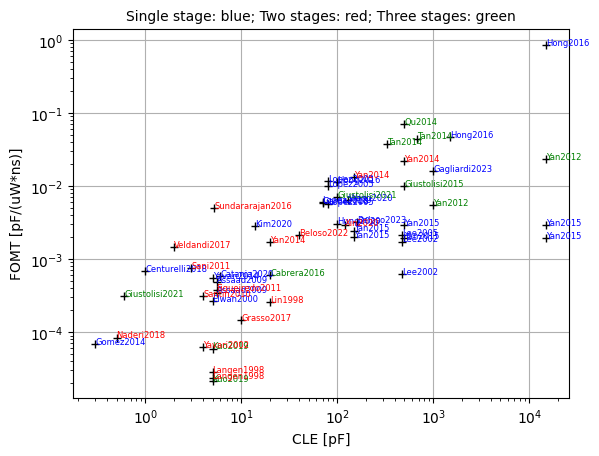

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(CLE, FOMT, 'k+')
ax.set_xlabel('CLE [pF]')
for ii, annotation in enumerate(apa_style_annotations()):
    xx=CLE[ii] 
    yy=FOMT[ii]
    if np.isfinite(xx) and np.isfinite(yy):
        ax.text(xx, yy, annotation, color=ns_to_color(ii), fontsize=6)
ax.set_ylabel('FOMT [pF/(uW*ns)]')
ax.set_title('Single stage: blue; Two stages: red; Three stages: green', fontsize=10)
ax.grid()

TOP 10 sorted by FOMN/CLE


,AU1,YEAR,CLE,FOMN,R_FOMN_CLE
65,Giustolisi,2021.0,0.6,0.000252,0.000420
68,Veldandi,2017.0,2,0.000731,0.000366
78,Catania,2020.0,6,0.001888,0.000315
20,Lopez,2005.0,80,0.023392,0.000292
21,Lopez,2005.0,80,0.020202,0.000253
35,Assaad,2009.0,5.6,0.000865,0.000155
41,Elwan,2000.0,5,0.000721,0.000144
22,Lopez,2005.0,80,0.011429,0.000143
77,Gagliardi,2023.0,1000,0.140725,0.000141


TOP 10 sorted by FOMN/CLE, excluding simulation-only designs


,AU1,YEAR,CLE,FOMN,R_FOMN_CLE
20,Lopez,2005.0,80,0.023392,0.000292
21,Lopez,2005.0,80,0.020202,0.000253
35,Assaad,2009.0,5.6,0.000865,0.000155
22,Lopez,2005.0,80,0.011429,0.000143
70,Sani,2011.0,3,0.000375,0.000125
59,Sundararajan,2016.0,5.2,0.000600,0.000115
34,Assaad,2009.0,5.6,0.000625,0.000112
26,Lopez,2018.0,70,0.006076,0.000087
27,Garde,2018.0,70,0.005833,0.000083


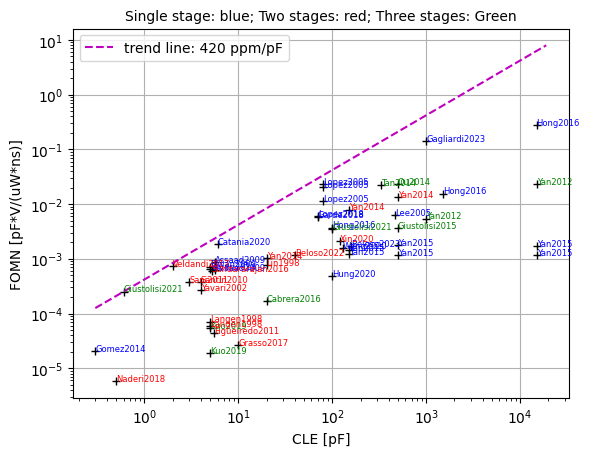

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(CLE, FOMN, 'k+')
ax.set_xlabel('CLE [pF]')
for ii, annotation in enumerate(apa_style_annotations()):
    xx=CLE[ii] 
    yy=FOMN[ii]
    if np.isfinite(xx) and np.isfinite(yy):
        ax.text(xx, yy, annotation, color=ns_to_color(ii), fontsize=6)
ax.set_ylabel('FOMN [pF*V/(uW*ns)]')
ax.set_title('Single stage: blue; Two stages: red; Three stages: Green', fontsize=10)
ax.grid()

# rank with respect to the FOMN/CLE trend line
R_FOMN_CLE = FOMN/CLE # FOMN-CLE Ratio
x['R_FOMN_CLE'] = R_FOMN_CLE.tolist()
sorted_x = x.sort_values(by='R_FOMN_CLE', ascending=False)
design_front_line = sorted_x['R_FOMN_CLE'].to_numpy()[0] 
print('TOP 10 sorted by FOMN/CLE')
display_sorted(sort_key='R_FOMN_CLE', number=10, print_key_list=['AU1', 'YEAR', 'CLE', 'FOMN'])

# annotate the scatter plot with the trend line
CL = np.arange(min(CLE), max(CLE), 10)
trend_line = design_front_line*np.arange(min(CLE), max(CLE), 10)
ax.loglog(CL, trend_line, 'm--', label='trend line: {} ppm/pF'.format(int(design_front_line*1e6)))
ax.legend()

if not(exclude_simulation_results):
    x2 = x.loc[x['EXPM']=='Measured']
    print('TOP 10 sorted by FOMN/CLE, excluding simulation-only designs')
    display_sorted(sort_key='R_FOMN_CLE', number=10, print_key_list=['AU1', 'YEAR', 'CLE', 'FOMN'], df=x2)

### Impact of CMOS technology node

FOMs of designs displayed by CMOS technology node.

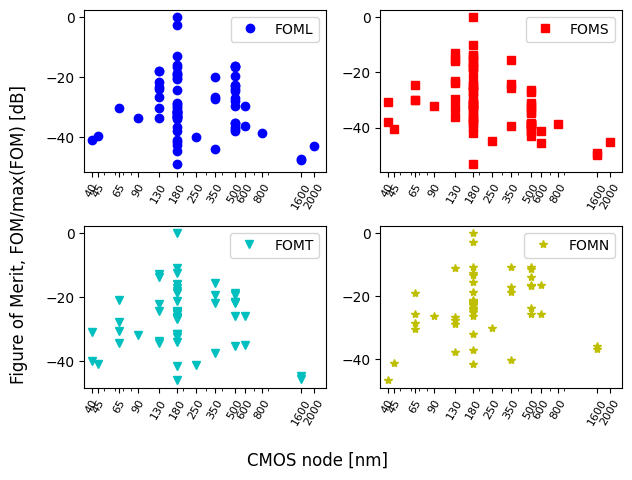

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2)

from matplotlib import ticker
def dB(a, m=10):
    return m*np.log10(a)

ax[0,0].plot(CMOS, dB(FOML/max(FOML)), 'bo', label='FOML')
ax[0,1].plot(CMOS, dB(FOMS/max(FOMS)), 'rs', label='FOMS')
ax[1,0].plot(CMOS, dB(FOMT/max(FOMT)), 'cv', label='FOMT')
ax[1,1].plot(CMOS, dB(FOMN/max(FOMN)), 'y*', label='FOMN')
for i in range(4):
    j, k = i%2, int(i/2)%2
    ax[j,k].set_xscale('log')
    ax[j,k].legend()
    CMOS_no_dups = list(dict.fromkeys(CMOS))
    ax[j,k].xaxis.set_ticks(CMOS_no_dups)
    ax[j,k].set_xticklabels(ax[j,k].get_xticks(), rotation=60, fontsize=8)
    ax[j,k].set_xlim([35, 2500])
fig.supxlabel('CMOS node [nm]')
fig.supylabel('Figure of Merit, FOM/max(FOM) [dB]')
fig.tight_layout()
pass

### FOMs by OTA architecture

In [11]:
FOM_max_list = []
for ii in range(1, 4):
    jj = np.where(x['NS'].to_numpy()==ii)
    ndesigns = len(jj[0])
    mx = max(FOML[jj]), max(FOMS[jj]), max(FOMT[jj]), max(FOMN[jj]), ndesigns
    FOM_max_list.append(mx)
FOM_max = np.reshape(FOM_max_list, (3,5))

# index names 
index_values = ['Single stage', 'Two stages', 'Three stages'] 
   
#  column names 
column_values = ['FOML', 'FOMS', 'FOMT', 'FOMN', 'N of designs'] 
  
# creating the dataframe 
x_max = pd.DataFrame(data = FOM_max,  
                  index = index_values,  
                  columns = column_values) 
display(x_max)

,FOML,FOMS,FOMT,FOMN,N of designs
Single stage,2229.729736,3445.945801,0.844595,0.278716,42.0
Two stages,19.444443,92.307693,NaN,NaN,28.0
Three stages,49.206348,180.440933,0.070862,0.023200,12.0


Please note that eventual NaNs in the previous database are due to missing parameters to properly calculate the FOMs.

### Correlations between different FOMs

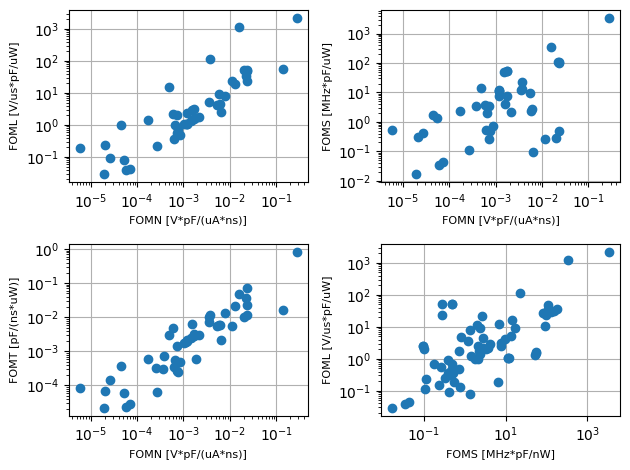

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0,0].loglog(FOMN, FOML, 'o')
ax[0,0].set_xlabel('FOMN [V*pF/(uA*ns)]', fontsize=8)
ax[0,0].set_ylabel('FOML [V/us*pF/uW]', fontsize=8)
ax[0,0].grid()

ax[0,1].loglog(FOMN, FOMS, 'o')
ax[0,1].set_xlabel('FOMN [V*pF/(uA*ns)]', fontsize=8)
ax[0,1].set_ylabel('FOMS [MHz*pF/uW]', fontsize=8)
ax[0,1].grid()

ax[1,0].loglog(FOMN, FOMT, 'o')
ax[1,0].set_xlabel('FOMN [V*pF/(uA*ns)]', fontsize=8)
ax[1,0].set_ylabel('FOMT [pF/(ns*uW)]', fontsize=8)
ax[1,0].grid()

ax[1,1].loglog(FOMS, FOML, 'o')
ax[1,1].set_xlabel('FOMS [MHz*pF/nW]', fontsize=8)
ax[1,1].set_ylabel('FOML [V/us*pF/uW]', fontsize=8)
ax[1,1].grid()

fig.tight_layout()
